<mark>############################## 10/03/2025 ############################### <mark>################################ Friday #################################

#Problem Statement

Using the dataframe model will decide if the customer will churn or Not.
Here we will use Random Forest where you will use combined multiple decision trees. On the basis of their output, if it is a classification problem, use majority voting method, if it is a regression problem use average method.

Here for the customer churn, it will be a classification problem,

# Customer Churn - Exploratory Data Analysis EDA

#1. Import/Declare library

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

#2. Import Dataset .CSV

In [25]:
df = pd.read_csv('/content/customer_churn.csv')

customerID = unique Id given to each customer
gender = Sex of the customer
SeniorCitizen = over retirement age. The values 0 = Fales and 1 = True

Partner = Customer with partner. The values 0 = Fales and 1 = True

Dependents = Customer with partner. The values 0 = Fales and 1 = True

tenure = A lenght of time a customer has been with the company

Based on the fields, it shows the company is providing online services and streaming services, telecom services to the customers.

Basis the service acquired, the customer is charged a monthly fee, Data also holds the total amount paid since the beginning of the service.

Churn: Customer churn refers to the percentage of customers who stop using a company's product or service during a specific timeframe. Are the customers opting out from the service

#3. Read First 5 Records

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#4. Read Last 5 records

In [27]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#5. Show the statistical summary

In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#6. Show the columns

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#7 Number of Rows and columns (Shape)

In [30]:
df.shape

(7043, 21)

#9 Info - summary of a DataFrame

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 10. Check for Null

In [32]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#11. Duplicates

In [33]:
df.duplicated().sum()
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [34]:
df.duplicated().sum()

np.int64(0)

#Preprocessing

# Learn the Datatype of the fields

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Field TotalCharges - Cleanup

**TotalCharges**      7043 non-null   object

Here the datatype is object, By right it should be numeric, however it is object. This happens mainly because some non-numeric value is attached to the numeric value.

In [37]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


There are 11 rows that has spaces in TotalCharges.
The next step would be to give a meaningful value.

Step 1: Convert the TotalCharges to numeric

Note:
errors="coerce" #Whichever the string value we are unable to convert into numeric or int will be converted to Nan Values

— NaN stands for “Not a Number”. It’s a placeholder used to represent missing or undefined values in numerical columns.


In [38]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [39]:
#Check for Null Values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [40]:
# Now you can drop or fill the Null values. For filling you can replace with meaningful values.
df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"])

In [41]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
0.00,11
20.20,11
19.75,9
20.05,8
19.90,8
...,...
130.15,1
3211.90,1
7843.55,1


As you can see now, it is 0.00 as monthly charges

In [42]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
0.00,11
20.20,11
19.75,9
20.05,8
19.90,8
...,...
130.15,1
3211.90,1
7843.55,1


In [43]:
#Check for Null Values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Fix duplicates.

In [44]:
df.duplicated().sum()

np.int64(0)

There is no duplicates

#customerID - Drop it - Irrelavant

In [45]:
#customerID doesn't play any role in making decision, hence it can be dropped
#Method 1
df.drop("customerID", axis=1, inplace=True)
#or
#Method 2
#df = df.drop(columns =["customerID"])

In [46]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

customerID is dropped successfully

#Encoding

There are several columns that are of type object, this cannot be directly used in the classification models. There Encoding should be used.

In Random and Decision tree models we don't need to check or remove outliers becuase they are resistant to outlier.

Resistance: Splitting is happening based on threshold values, if threshold is not satisifed the node will be split, during this process outlier will be removed.

Decision Tree Splitting Logic
✅ How Splitting Works

• 	At each node, the algorithm chooses a feature and a threshold that best separates the data.

• 	It uses criteria like Gini impurity, entropy, or variance reduction to decide where to split.

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
      df[col] = le.fit_transform(df[col])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


Transformation is applied to all the columns

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


DataFrame is absolutely ready for model building

#******************  Model Building **********************

1. Split the data in column wise - Independent columns and dependent columns
2. Split the data for Training the model and testing the model

#1. Split the data - Independent and Dependent

In [50]:
x = df.drop(columns = "Churn", axis=1)
y = df["Churn"]

# Slicing
# X = df.iloc[:, :-1]
# Y = df.iloc[-1]

In [57]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [58]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


#2. Split the data for Training and testing the model

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [52]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3309,0,0,0,0,25,1,0,2,1,1,1,1,1,1,1,0,1,19.90,527.50
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,1031.70
3006,1,1,0,0,14,1,2,1,0,0,0,0,0,0,0,1,2,74.95,1036.75
2410,0,0,1,0,43,1,2,1,0,2,0,0,0,0,0,0,2,80.45,3398.90
734,0,0,1,0,27,1,2,1,0,0,2,0,0,2,0,0,0,90.15,2423.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,1,0,1,0,52,1,0,1,2,2,2,2,2,2,2,1,2,106.30,5487.00
356,0,1,0,0,16,1,2,0,2,0,0,0,0,0,0,1,2,54.10,889.00
4908,0,1,0,0,28,1,2,1,0,2,2,0,2,2,0,1,2,106.15,3152.50
6276,0,0,1,1,15,1,0,2,1,1,1,1,1,1,1,0,1,20.35,335.95


In [53]:
x_train.shape

(5634, 19)

In [54]:
y_train

,Churn
3309,0
3825,0
3006,1
2410,0
734,0
...,...
5478,0
356,0
4908,1
6276,0


In [55]:
y_train.shape

(5634,)

In [56]:
x_test.shape

(1409, 19)

In [57]:
y_test.shape

(1409,)

For unbiased model output, the ratio of 'Customer Churn = Yes' and 'Customer Churn = No' should be balanced — meaning the dataset should ideally contain an equal or comparable number of churned and non-churned customers.

In [58]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [59]:
5174/1869

2.7683253076511503

Here there is a large imbalance with a ratio 2.77

In [60]:
y_train.value_counts()

,count
Churn,
0,4162
1,1472


In [61]:
4162/1472

2.827445652173913

Here there is a large imbalance in the training data with a ratio 2.82

In [62]:
y_test.value_counts()

,count
Churn,
0,1012
1,397


In [63]:
1012/397

2.5491183879093198

Here there is a large imbalance in the training data with a ratio 2.55

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22, stratify = y)

In [65]:
x_train.shape

(5634, 19)

In [66]:
y_train.shape

(5634,)

In [67]:
y_train.value_counts()

,count
Churn,
0,4139
1,1495


In [68]:
4139/1495

2.768561872909699

In [69]:
y_test.value_counts()

,count
Churn,
0,1035
1,374


In [70]:
1035/374

2.767379679144385

#3. Random Forest

In [71]:
from random import random
from sklearn.ensemble import RandomForestClassifier


In [77]:
RF_model1 = RandomForestClassifier(n_estimators=100)

n_estimators = 100

What it does is, it sets the number of decision tree that wll be taken help of to get the ensemble model to make this Random Forest.
After setting up estimator, From that point Model is ready for the training.

In [79]:
#Train the Model
RF_model1.fit(x_train, y_train)

RandomForestClassifier()

In [81]:
#Test the model with x_test. Predict the value for the x_test.
#Here y_pred has all the prediciton.
y_pred = RF_model1.predict(x_test)

In [74]:
# Now compare the result with y_test to see how well the model has learned.
#What percentage of value the model is able to predict correctly
from sklearn.metrics import *
print(accuracy_score(y_test, y_pred))

0.801277501774308


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.49      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



**Precision**

0 = If the class was zero, how many of those predictions were correct.

- Class 0 (No Churn): Precision = 0.83 → When the model predicted “No Churn,” it was correct 83% of the time.
- Class 1 (Yes Churn): Precision = 0.67 → When the model predicted “Yes Churn,” it was correct 67% of the time.


**Recall**

Of all actual instances of a class, how many did the model correctly identify?
recall is class-specific.

- Class 0: Recall = 0.91 → Out of all true “No Churn” cases, 91% were correctly predicted.
- Class 1: Recall = 0.49 → Out of all true “Yes Churn” cases, only 49% were correctly predicted.

This could be becuase of class imbalance.

**F1-Score**
This gives the harmonic mean of **Precision** and **Recall**.

**Macro Average**

*Macro Average for Precision*

Represents Mean of the Precision class. Here the precision for class 0 is 83% and for class 1 is 67%. The average precision is (83+67)/2 = 150/2 = 75% (0.75)

*Macro Average for Recall*

Represents Mean of the Recall.
The average Recall is (91+49)/2 = 140/2 = 70% (0.75)

*Macro Average for F1-Score*
The average F1-score is (57+87)/2 = 144/2 = 72% (0.72)


**Weighted Average**

When you have class imbalance as above (huge variance between class 0 and class 1) To know the accuracy of how good the model is performing for both classes we use Weighted Average. Here Class 0 has more weight because the dataframe has more values to be predicted for class 0 as compared to class 1.

When classes are balanced, Macro Average is used. When classes are imbalanced, Weighted Average is used.

**Support**

The number of actual samples for each class.

- Class 0: 1035
- Class 1: 374
- Total: 1409


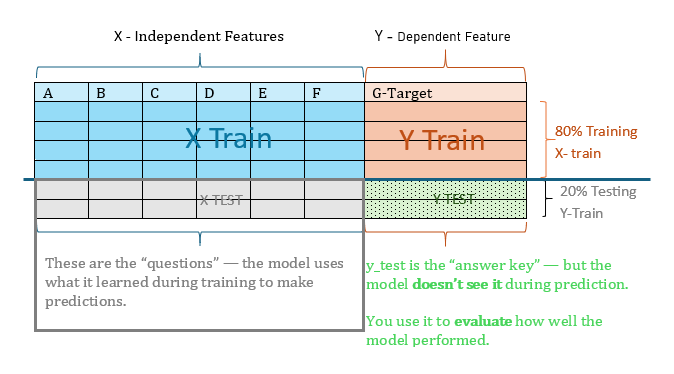

X Train is taken as question and Y Train is taken as answer. Models lears from it
🔹 X_train = Features (Questions)
- These are the input variables — the clues or signals the model uses to make predictions.
- Examples: age, tenure, contract type, monthly charges, etc.
- The model doesn’t know what these mean — it learns patterns from them.
🔹 y_train = Target (Answers)
- This is the output label — what the model is trying to predict.
- In classification: churn (Yes/No), fraud (True/False), etc.
- In regression: price, score, probability, etc.

X Test
Based on the learnings, model will try to get some answers for X test. These answers are stored in y_pred values

compare the result Y Test and Y Pred
Matches can be as follows
Exact match, close match, nomatch

# Taking Different Parameters - Tree Level

**Number of decision Tree**
Comparing the performance of the model based on number of decision trees used calculate the predicition.

Earlier we took only single parameter

RF_model1 = RandomForestClassifier(n_estimators=100)

Hit and Trial method

Here the n_estimator is assiged values

n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [85]:
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for i in n_estimators:
    RF_model1 = RandomForestClassifier(n_estimators=i)
    RF_model1.fit(x_train, y_train)
    y_pred = RF_model1.predict(x_test)
    a = accuracy_score(y_test, y_pred) *100
    print(a, i)

79.347054648687 50
80.8374733853797 100
79.91483321504613 200
80.1277501774308 300
80.19872249822569 400
79.91483321504613 500
80.41163946061036 600
80.19872249822569 700
79.77288857345636 800
80.41163946061036 900
80.19872249822569 1000


Here the best prediction is for esitmator 100

In [86]:
RF_model2 = RandomForestClassifier(
    max_depth = 10,
    min_samples_split = 5,
    criterion = 'gini',
    random_state = 42

)
# Here max_depth is deep it would be going to get the leaf node.
# Here the min_samples_split is how much minimum number of samples we should be having to make the split
# Here Criterion could be Entropy or gini
# random_state = 42, just to ensure the model uses the same set of data instead of choosing different data during every run
# RandomForestClassifier is the method used to build the model

# You can use all tree level parameters

In [87]:
RF_model2.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [88]:
y_pred2 = RF_model2.predict(x_test)

In [89]:
accuracy_score(y_test, y_pred2)


0.8048261178140526

#Taking Different Parameters - Forest Level

In [101]:
RF_model3 = RandomForestClassifier(
    n_estimators = 1000,
    max_features = 'sqrt',
    bootstrap = True,
    random_state = 42
)
# max_features = 'sqrt', Here you can give numeric value, or log function or sqrt method which is mostly used in classification algorithm
# When there is a large number of features you can select how many number of features can be used
# bootstrap = True, Mostly it is true. Here the values that are taken with replacement



In [102]:
RF_model3.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [103]:
y_pred3 = RF_model3.predict(x_test)

In [104]:
accuracy_score(y_test, y_pred3)

0.7998580553584103

#Taking Different Parameters - GridSearchCV

Whenever you are using grid_search_cv, first you have to use basic model

In [105]:
RF_model4 = RandomForestClassifier(random_state=42)

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = {
    'n_estimators': [400, 600, 700],
    'max_depth': [None, 10, 20],
    'max_features': ['log', 'sqrt'],
    'min_samples_split':[2, 5,10]
}

grid_search = GridSearchCV(
    estimator=RF_model4,
    param_grid=param_grid,
    cv=5,
    scoring = 'accuracy'
)
grid_search.fit(x_train, y_train)

print("Best parameters ;", grid_search.best_params_)
print("Best score ;", grid_search.best_score_)

Best parameters ; {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 700}
Best score ; 0.7994335706326704


Best parameters ; {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 700}

using the above parameter we can get the best values.

Best score here 79.94%

param_grid = {

    'n_estimators': [700],

    'max_depth': [20],

    'max_features': ['sqrt'],

    'min_samples_split':[10]
    
}

When n_estimator is a single parameter, lets say 100, it builts 100 Decision Trees, the output is stored in y_pred. Using this accuracy is calculated.

When we are running a loop with different estimators, we manuall pick  whichever is the greatest accuracy.

In the grid we are passing more than one value for estimator, the model be built for each value. The accuracy will be checked for both values. What happens here is the base model is passed with parameters that are mentioned in the grid_search and the accuracy is checked.
Best parameters are selected based on the highest accuracy value.

Cross Validation = cv = 5, split the data into 5 folds. Which means n-1 data will be used for training and 1 data will be used for testing. From that the accuracy part will be calculated. Basically training data is split into parts (n).

in this case training data is split into 5 different parts, out of which 4 are used for training and 1 is used for testing. It is not always the case where the last data is considered as a test data.

Below is the explanation

Lets says a training data is divided into three parts A, B, and C.

First A and B will be taken as training data and C will be the test data

First A and C will be taken as training data and B will be the test data

First B and C will be taken as training data and A will be the test data

Model checks which combination gives the best answers and the parameters used for that combination is considered as the best parameters

for each n_estimators all the parameters such as max_depth, max_features, min_sample_split will be tested. More the parameters more the time taken to process.

example:

param_grid = {

    'n_estimators': [50, 100],

    'max_depth': [5, 10, 15]

}
cv = 5

here cv is 5 which means the data will be split in 5 different parts. Here all the all the combination of these 5 different parts to get the values of A, B, C, D, and E and see how the model is performing.

Use A, B, C, D as training and E as the test and check the accuracy

Use B, C, D, E as training and A as the test and check the accuracy

Use C, D, E, A as training and B as the test and check the accuracy

Use D, E, A, B as training and C as the test and check the accuracy

Use E, A, B, C as training and D as the test and check the accuracy


Now the parameter

n_estimator 50 will be compared with max_depth 5, 10, 15 = 3 combination

n_estimator 100 will be compared with max_depth 5, 10, 15 = 3 combination

A total of 6 combinations for 5 times which is equivalent to 30 different models



